In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
import statsmodels.api as sm

**CONFIDENCE INTERVALS**

**EXERCISE 1.**

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees.

Give a 99% confidence interval for the average body temperature of healthy people.

**1. Solution**

**Confidence Interval = x +- z * (s/sqrt(n))**

Sample mean(x) = 98.25 degrees
Sample standard deviation(s) = 0.73 degrees
Sample size(n) = 130

We want a 99% confidence interval.

The z-score for a 99% confidence level is approximately 2.576.

Upper Limit = 98.25 + 2.576 * (0.73/sqrt(130)) = 98.415

Lower Limit = 98.25 - 2.576 * (0.73/sqrt(130)) = 98.085

CI = (98.085, 98.415)

**2. Solution**

In [2]:
sample_mean = 98.25
sample_std = 0.73
sample_size = 130
confidence_level = 0.99

z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("99% Confidence Interval:", confidence_interval)

99% Confidence Interval: (98.08508192246582, 98.41491807753418)


**3. Solution**

In [3]:
sem = sample_std / np.sqrt(sample_size)
sem

0.06402523540941313

In [4]:
moe = 2.58 * sem
moe

0.1651851073562859

In [5]:
upper_limit = sample_mean + moe
lower_limit = sample_mean - moe
print('99% Confidence Interval:',(lower_limit, upper_limit))

99% Confidence Interval: (98.08481489264372, 98.41518510735628)


**EXERCISE 2.**

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

**1. Solution**

In [6]:
sample_mean = 5.4
sample_std = 3.1
sample_size = 500
confidence_level = 0.95

df = sample_size - 1
t_score = t.ppf((1 + confidence_level) / 2, df)
margin_of_error = t_score * (sample_std / np.sqrt(df))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print('95% Confidence Interval:', confidence_interval)

95% Confidence Interval: (5.127344562608701, 5.6726554373913)


**2. Solution**

In [7]:
sem = sample_std / np.sqrt(sample_size)
sem

0.13863621460498696

In [8]:
moe = 1.96 * sem
moe

0.27172698062577444

In [9]:
upper_limit = sample_mean + moe
lower_limit = sample_mean - moe
print('95% Confidence Interval:',(lower_limit, upper_limit))

95% Confidence Interval: (5.128273019374226, 5.671726980625775)


**HYPOTHESIS TESTING**




**EXERCISE 3.**

The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [10]:

mu = 13.20
sigma = 2.50 
x_bar = 12.20
n = 40 
alpha = 0.01 

std_error = sigma / (n ** 0.5)

z_score = (x_bar - mu) / std_error

p_value = norm.cdf(z_score)

if p_value < alpha:
    print("Reject the null hypothesis. The company can be accused of paying substandard wages.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to accuse the company of paying substandard wages.")

print("Statistic:", z_score)
print("p-value:", p_value)

Reject the null hypothesis. The company can be accused of paying substandard wages.
Statistic: -2.5298221281347035
p-value: 0.005706018193000826


**EXERCISE 4.** 

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [13]:
df = pd.read_excel('soil.xlsx')

In [16]:
from scipy.stats import ttest_ind

soil1 = df['Soil1'].dropna()
soil2 = df['Soil2']

t_statistic, p_value = ttest_ind(soil1, soil2)

alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis. The soils appear to differ with respect to average shear strength.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the soils differ with respect to average shear strength.")

print("Statistic:", t_statistic)
print("p-value:", p_value)

Reject the null hypothesis. The soils appear to differ with respect to average shear strength.
Statistic: 5.1681473319343345
p-value: 2.593228732352821e-06


**EXERCISE 5.**

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [17]:
data = pd.read_excel("2015 PISA Test.xlsx")
data

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


Descriptive statistics for European countries:
count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

Descriptive statistics for Asian countries:
count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

T-test results:
Statistic: 0.8700553179679789
p-value: 0.38826888111307556


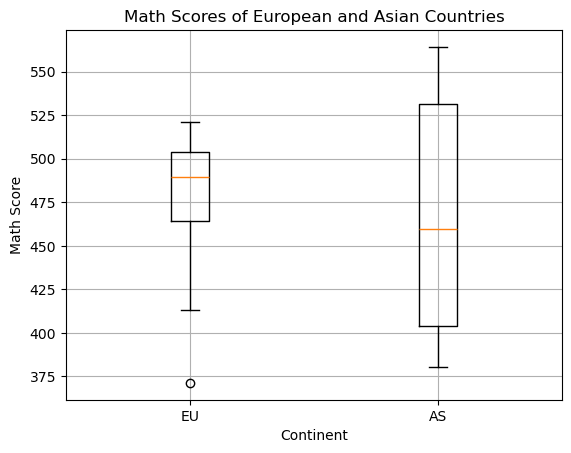

In [18]:
import matplotlib.pyplot as plt

eu_countries = data[data['Continent_Code'] == 'EU']['Math']
as_countries = data[data['Continent_Code'] == 'AS']['Math']

eu_stats = eu_countries.describe()
as_stats = as_countries.describe()

t_statistic, p_value = stats.ttest_ind(eu_countries, as_countries)

print("Descriptive statistics for European countries:")
print(eu_stats)
print("\nDescriptive statistics for Asian countries:")
print(as_stats)

print("\nT-test results:")
print("Statistic:", t_statistic)
print("p-value:", p_value)

plt.boxplot([eu_countries, as_countries], labels=['EU', 'AS'])
plt.xlabel('Continent')
plt.ylabel('Math Score')
plt.title('Math Scores of European and Asian Countries')
plt.grid(True)
plt.show()

**Conclusion:**

According to the t-test results here, since the p-value value is 0.388, it is above the determined significance level (usually 0.05). This indicates that the observed difference may have occurred by chance and is not statistically significant. As a result, according to these t-test results, there is no significant difference in mathematics scores between the two groups (European and Asian countries).